**Linear Regression Models - OLS, Ridge Regression, and Lasso Regression**

All About Regressions
Linear regression is one of the essential parametric models in statistical learning. We have discussed three types of regression models: ordinary least squares (OLS), ridge regression, and lasso regression. OLS can be learned as long as the training features are linearly independent. Ridge regression adopts L2 regularization for model learning, and Lasso adopts L1 regularization. Surprisingly, the prediction accuracy of the three types of models may be heavily influenced by how we preprocess the features and outcome values. We are going to explore these aspects in this homework.

When preparing the training and testing datasets, we can choose to apply different preprocessing procedures. For the outcome values (i.e.,  y
 ), we can choose to shift the mean (in training data) to zero by computing the mean of  y
 ,  y¯train
 , in the training data and subtract  y¯train
  from all outcome values in the training and testing data. This will give us a zero mean for the outcome values of training data, and, in most cases, the mean of outcome values in testing data should be very close to zero. We will refer this procedure as "de-mean" in the subsequent discussion.

To sum up the two preprocessing procedures for outcome values  y
 , we can choose to (1) keep the original numerical value (referred to as "keep"), or (2) de-mean. If the de-meaned  y
  is used in model training, then we need to add  y¯train
  to the prediction. The reason is obvious: we need to shift the mean back to  y¯train
 .

We now turn our attention to the feature values. The feature can have continuous values or binary values. For continuous-valued features, we can standardize the feature values by subtracting the mean and then dividing the residuals with their standad deviation. This shifts the mean of the feature to zero and scales the feature to have a unit variance in the training data. You should apply the same procedure for test data using the mean and standard deviation computed from training data.

If the feature is binary (i.e., x_binary in the table below), then we usually do not apply feature standardization. However, you may choose do standardize binary feature or simply do this by accident.

To explore the effects of these pre-processing procedures on prediction performance, we are going to compute the RMSE of the following 9 cases:


**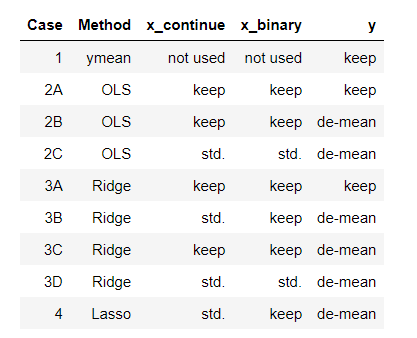**

Each case use a different model and data preprocessing procedures. The "ymean" method in Case 1 simply uses the mean of  y
  in the training data to do prediction. Cases 2A to 2C use OLS to train and predict. They are different in terms of how we preprocess feature values and outcome values. For example, Case 2C standardize all features (continuous-valued or binary) and use de-meaned y to train and predict outcome values. Cases 3A to 2D adopt Ridge regressiona and Case 4 adopts the Lasso regression. A constant term should be included in OLS, Ridge and Lasso regressions.

You are allowed to use learning models in sklearn.linear_model in this homework.

Note that in some of this homework questions we compute and report the RMSE with respect to different hyperparameter values. We adopted this setting to simply the questions. You should not tune hyperparameters using test data in a real life scenario.

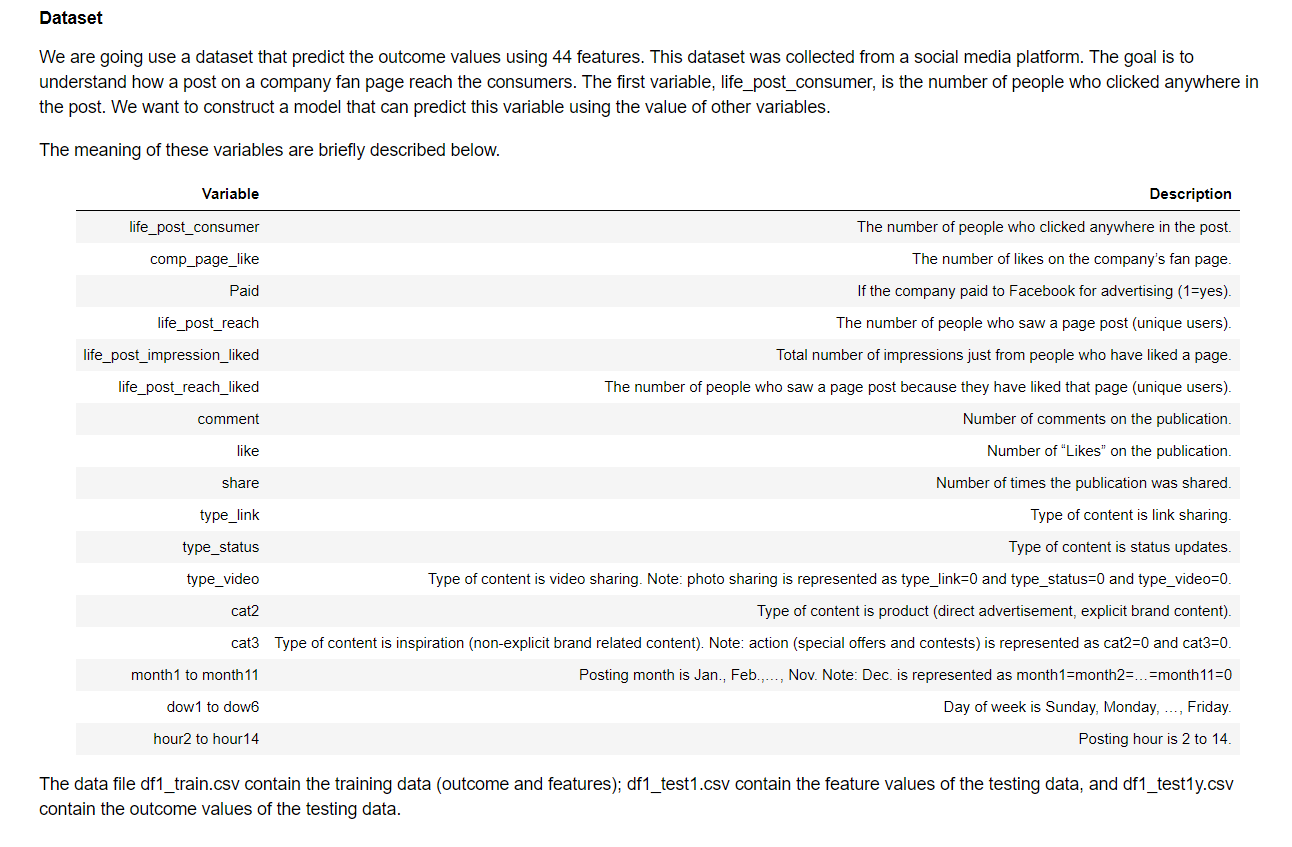

<font color = blue> **Import data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_train = pd.read_csv("data/df1_train.csv",usecols = range(1,44))
y_train = pd.read_csv("data/df1_train.csv",usecols = [0])
x_test = pd.read_csv("data/df1_test1.csv")
y_test = pd.read_csv("data/df1_test1y.csv")

**Q1**
Conduct exploratory analysis on this dataset. You should at least provide summary statistics and visualizations of the key variables. Moreover, you should discuss the characteristics of this dataset.

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 43 columns):
comp_page_like                400 non-null int64
Paid                          400 non-null int64
life_post_reach               400 non-null int64
life_post_impression_liked    400 non-null int64
life_post_reach_liked         400 non-null int64
comment                       400 non-null int64
like                          400 non-null int64
share                         400 non-null int64
type_link                     400 non-null int64
type_status                   400 non-null int64
type_video                    400 non-null int64
cat2                          400 non-null int64
cat3                          400 non-null int64
month1                        400 non-null int64
month2                        400 non-null int64
month3                        400 non-null int64
month4                        400 non-null int64
month5                        400 non-null int64
month6       

<font color = purple>We know that there are 43 features and 400 samples in training data from above table.

In [ ]:
x_train.head(3)

,comp_page_like,Paid,life_post_reach,life_post_impression_liked,life_post_reach_liked,comment,like,share,type_link,type_status,...,hour5,hour6,hour7,hour8,hour9,hour10,hour11,hour12,hour13,hour14
0,125612,0,2763,3519,2124,0,62,10,0,0,...,0,0,0,0,0,0,0,0,0,0
1,135700,0,3756,4935,2556,16,117,30,0,0,...,0,0,0,0,0,0,1,0,0,0
2,137020,1,1357,2154,1120,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


<font color = purple> And only *comp_page_like*,*life_post_reach*,*life_post_impression_liked*,*life_post_reach_liked*,*comment*,*like*,and *share* are continuous value. Thus, I separated the features into two arrays for later use.

In [ ]:
# Store all continuous features in conti_vec, and binary features in binary_vec
conti_vec = ['comp_page_like','life_post_reach','life_post_impression_liked','life_post_reach_liked'
            ,'comment','like','share']
binary_vec = [i for i in x_train.columns if i not in conti_vec]

<font color = purple>  
    
- Absolute correlation with the target y
    

In [ ]:
train = pd.concat( [x_train, y_train], axis=1 )
train.corr(method = 'pearson')['life_post_consumer'].abs().sort_values(ascending=False)

life_post_consumer            1.000000
life_post_reach               0.481325
life_post_reach_liked         0.478766
type_status                   0.397365
share                         0.341959
like                          0.306460
comment                       0.300871
life_post_impression_liked    0.210418
comp_page_like                0.165473
month2                        0.148609
month11                       0.139497
type_link                     0.116642
type_video                    0.115098
cat3                          0.088801
cat2                          0.087384
Paid                          0.071464
hour8                         0.066104
month3                        0.061198
month1                        0.060618
month10                       0.060055
hour3                         0.057977
hour13                        0.057502
dow2                          0.057212
dow1                          0.055849
hour14                        0.054135
hour10                   

<font color = purple>  
    
From the absolute correlation, I took the features whose absolute correlation is higher than 0.3 to discuss later. They are *life_post_reach*, *life_post_reach_liked*, *type_status*, *share*, *like*, *comment*.

<font color = purple>  
    
- *life_post_reach* and *life_post_reach_liked*
    

In [ ]:
x_train['life_post_reach'].describe()

count       400.000000
mean      13436.855000
std       20454.614675
min         238.000000
25%        3282.500000
50%        5150.000000
75%       13232.000000
max      139008.000000
Name: life_post_reach, dtype: float64

In [ ]:
x_train['life_post_reach_liked'].describe()

count      400.000000
mean      6585.952500
std       7599.228501
min        236.000000
25%       2171.000000
50%       3391.000000
75%       8011.000000
max      48368.000000
Name: life_post_reach_liked, dtype: float64

In [ ]:
reach_liked_ratio = x_train['life_post_reach_liked']/x_train['life_post_reach']
reach_liked_ratio.describe()

count    400.000000
mean       0.661237
std        0.194108
min        0.024149
25%        0.585209
50%        0.689892
75%        0.789847
max        1.000000
dtype: float64

<font color = purple>  
    The mean of reach_liked_ratio is 66%, which shows that in average, around 66% of people who saw the post come from the people like the page. And the 25% percentile also reached 58%, it can refer to that in most cases, over 50% of the number of people seeing the post comes from the page's original fans.
    

<font color = purple>  
    
- *type_status*, *type_link*, and *type_video*
    

[33, 15, 7, 345]


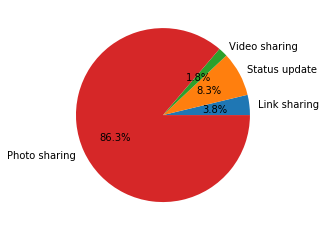

In [ ]:
status_cnt = x_train['type_status'].sum()
link_cnt = x_train['type_link'].sum()
video_cnt = x_train['type_video'].sum()
photo_cnt = 400-status_cnt -link_cnt-video_cnt
plt.pie([ link_cnt, status_cnt, video_cnt, photo_cnt],
         labels = ['Link sharing','Status update', 'Video sharing', 'Photo sharing'],autopct='%1.1f%%')
plt.show()
plt.close()

<font color = purple> The pie chart shows that most of the type of posts are photo sharing.

In [ ]:
x_train['type_status'].sum()

33

<font color = purple>  
    
- *Paid*
    

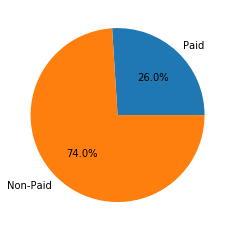

In [ ]:
cnt = x_train['Paid'].sum()
plt.pie([cnt, 400-cnt], labels = ['Paid', 'Non-Paid'],autopct='%1.1f%%')
plt.show()
plt.close()

<font color = purple>  
    
- *Share*
    

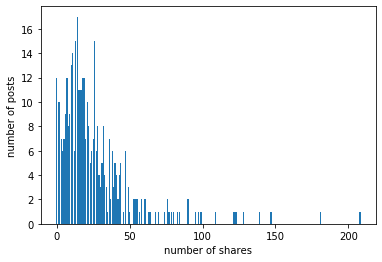

In [ ]:
x = x_train['share'].value_counts().sort_index().keys().to_list()
y = x_train['share'].value_counts().sort_index().to_list()

plt.bar(x,y)
plt.xlabel('number of shares')
plt.ylabel('number of posts')
plt.show()
plt.close()

<font color = purple>  
    
- *Like*
    

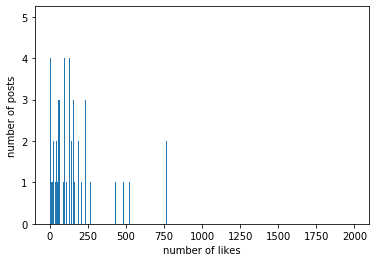

In [ ]:
x = x_train['like'].value_counts().sort_index().keys().to_list()
y = x_train['like'].value_counts().sort_index().to_list()

plt.bar(x,y)
plt.xlabel('number of likes')
plt.ylabel('number of posts')
plt.show()
plt.close()

<font color = purple>  
    
- *Comment*
    

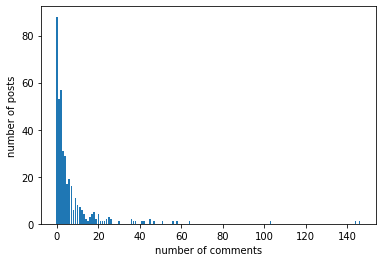

In [ ]:
x = x_train['comment'].value_counts().sort_index().keys().to_list()
y = x_train['comment'].value_counts().sort_index().to_list()

plt.bar(x,y)
plt.xlabel('number of comments')
plt.ylabel('number of posts')
plt.show()
plt.close()

<font color = purple>  
    
- *Month*
    

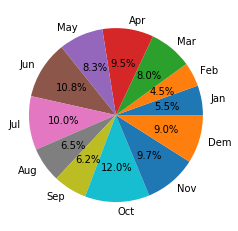

In [ ]:
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dem']
month_cnt = np.zeros((12))
cnt_12 = 400
for i in range(11):
    month_cnt[i] = x_train['month'+str((i+1))].sum()
    cnt_12 -= month_cnt[i]
month_cnt[11] = cnt_12

plt.pie(month_cnt, labels = month, autopct='%1.1f%%')
plt.show()
plt.close()

<font color = purple> This pie chart shows a balanced distribution of data points in months.

<font color = purple>  
    
- *DOW*
    

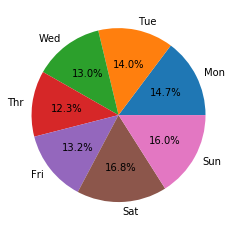

In [ ]:
dow = ['Mon','Tue','Wed','Thr','Fri','Sat','Sun']
dow_cnt = np.zeros((7))
cnt_7 = 400
for i in range(6):
    dow_cnt[i] = x_train['dow'+str((i+1))].sum()
    cnt_7 -= dow_cnt[i]
dow_cnt[6] = cnt_7

plt.pie(dow_cnt, labels = dow, autopct='%1.1f%%')
plt.show()
plt.close()

<font color = purple>  This pie chart shows a balanced distribution of data points on diffent days of the week.

<font color = purple>  
    
- *Hour*
    

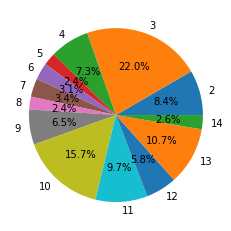

In [ ]:
hr = range(2,15)
hr_cnt = np.zeros((13))
for i in range(13):
    hr_cnt[i] = x_train['hour'+str((i+2))].sum()

plt.pie(hr_cnt, labels = hr, autopct='%1.1f%%')
plt.show()
plt.close()

<font color = purple> This pie chart indicates that more data points were in 3 or 10 posting hours.

<font color = blue> **Build some functions first**

<font color = purple>

For easier calculation for RMSE in every case, I first built a function for it.

Additionally, since the 9 cases are in different combination of model used, processing on continuous/binary variables and the outcome value y, a function "predict" was created to streamline the prediction process.

In [ ]:
# Definde RMSE function to obtain RMSE of predicted_y and y_test
def RMSE( pre_array, train_array): #train_array type is series
    RMSE = np.sqrt(np.square( pre_array - train_array.to_numpy()).mean())
    return RMSE

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
"""
predict is a function that will return 2 elements.
If the regression model is OLS, then the first element returned is predicted_y, second is RMSE.
If the regression model is Ridge or Lasso, then the first element returned is predicted_y whose RMSE is the lowest
, and second is RMSE_vec with respect to alpha.
"""

def predict(x_train, y_train, x_test, y_test, method, x_conti, x_binary, y_method):
    x_train_copy = x_train.copy(deep = True)
    y_train_copy = y_train.copy(deep = True)
    x_test_copy = x_test.copy(deep = True)

    if x_conti == 'std.': # standardize continuous features
        scalar = StandardScaler().fit( x_train_copy[conti_vec] )
        x_train_copy[conti_vec] = scalar.transform( x_train_copy[conti_vec])
        x_test_copy[conti_vec] = scalar.transform( x_test_copy[conti_vec])

    if x_binary == 'std.': # standardize binary features
        scalar = StandardScaler().fit( x_train_copy[binary_vec] )
        x_train_copy[binary_vec] = scalar.transform(x_train_copy[binary_vec])
        x_test_copy[binary_vec] = scalar.transform(x_test_copy[binary_vec])

    if y_method == 'de-mean':
        # shift y by y_mean
        # remember to shift it back
        y_mean = y_train_copy['life_post_consumer'].mean()
        y_train_copy -= y_mean

    if method == 'OLS':
        lm = LinearRegression()
        lm.fit(x_train_copy, y_train_copy)
        y_pre = lm.predict(x_test_copy)
        RMSE_pre = RMSE(y_pre, y_test)
        if y_method == 'de-mean': # Shift predictions back
            y_pre += y_mean
        return y_pre, RMSE_pre

    else:
        alpha_set = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
        RMSE_vec = np.zeros((10)) # Vector to store RMSE using different alphas
        if method == "Ridge":
            y_pre_vec = np.zeros((10,50,1)) # Vector to store RMSE using different alphas
            for i in range(len(alpha_set)):
                rm = Ridge(alpha = alpha_set[i])
                rm.fit(x_train_copy, y_train_copy)
                y_pre_vec[i] = rm.predict(x_test_copy)
                if y_method == 'de-mean': # Shift predictions back
                    y_pre_vec[i] += y_mean
                RMSE_vec[i] = RMSE(y_pre_vec[i], y_test)

        elif method == "Lasso":
            y_pre_vec = np.zeros((10,50)) # Vector to store RMSE using different alphas
            for i in range(len(alpha_set)):
                la = Lasso(alpha = alpha_set[i])
                la.fit(x_train_copy, y_train_copy)
                y_pre_vec[i] = la.predict(x_test_copy)
                if y_method == 'de-mean': # Shift predictions back
                    y_pre_vec[i] += y_mean
                RMSE_vec[i] = RMSE(y_pre_vec[i], y_test)

        index = np.argmin(RMSE_vec) # the index of the best alpha(smallest RMSE) in alpha_vec
        y_pre = y_pre_vec[index]    # y_pre is the prediction with best RMSE
        print("Best alpha = ", alpha_set[index])
        print("Best RMSE = ", RMSE_vec[index])
        return y_pre, RMSE_vec

In [ ]:
np.set_printoptions(suppress=True)

**Q2 Case 1: Method = ymean, x_continue = not used, x_binary = not used, y = keep**

Construct a prediction model using the setting of Case 1.

What is the test RMSE? What are the predictions and true outcome values for the first 20 data points in the testing data?

In [ ]:
# Calculate y_mean directly to be y_pre, then calculate RMSE using RMSE function
y_mean = y_train['life_post_consumer'].mean()
y_pre_1 = np.zeros( test_cnt )
y_pre_1 += y_mean
RMSE_1 = RMSE( y_pre_1, y_test)

In [ ]:
print("The first 20 predictions and true outcome values in testing data:")
result = pd.DataFrame(y_pre_1[:20], columns = ['Predictions'])
result['True outcomes'] = y_test
print(result)
print("\nRMSE of case 2A is ", RMSE_1, "\n")

The first 20 predictions and true outcome values in testing data:
    Predictions  True outcomes
0        810.34           1183
1        810.34            189
2        810.34           2327
3        810.34             76
4        810.34            354
5        810.34            713
6        810.34            204
7        810.34            288
8        810.34            555
9        810.34            586
10       810.34            446
11       810.34            884
12       810.34            524
13       810.34            672
14       810.34             23
15       810.34            570
16       810.34           1361
17       810.34           5934
18       810.34           2319
19       810.34           1633

RMSE of case 2A is  928.809510933216 



**Q3 Case 2A: Method = OLS, x_continue = keep, x_binary = keep, y = keep**

Construct a prediction model using the setting of Case 2A.

What is the test RMSE? What are the predictions and true outcome values for the first 20 data points in the testing data?



In [ ]:
y_pre_2a, RMSE_2a = predict(x_train, y_train, x_test, y_test, 'OLS',"keep",'keep','keep')

In [ ]:
print("The first 20 predictions and true outcome values in testing data:")
result = pd.DataFrame(y_pre_2a[:20], columns = ['Predictions'])
result['True outcomes'] = y_test
print(result)
print("\nRMSE of case 2A is ", RMSE_2a, "\n")

The first 20 predictions and true outcome values in testing data:
    Predictions  True outcomes
0    781.579915           1183
1    315.920431            189
2   2279.084852           2327
3   -136.342864             76
4    302.356241            354
5    462.424024            713
6    321.677708            204
7    504.522448            288
8    505.895471            555
9    488.367006            586
10   392.614235            446
11   388.918467            884
12   804.875275            524
13   634.323644            672
14   176.317656             23
15   645.729138            570
16  1983.538589           1361
17  3144.397100           5934
18  4060.610712           2319
19  4288.223081           1633

RMSE of case 2A is  692.2891271362014 



**Q4 Case 2B: Method = OLS, x_continue = keep, x_binary = keep, y = dmean**


Construct a prediction model using the setting of Case 2C.

What is the test RMSE? What are the predictions and true outcome values for the first 20 data points in the testing data?

In [ ]:
y_pre_2b, RMSE_2b = predict(x_train, y_train, x_test,y_test, 'OLS',"keep",'keep','de-mean')

In [ ]:
print("The first 20 predictions and true outcome values in testing data:")
result = pd.DataFrame(y_pre_2b[:20], columns = ['Predictions'])
result['True outcomes'] = y_test
print(result)
print("\nRMSE of case 2B is ", RMSE_2b, "\n")

The first 20 predictions and true outcome values in testing data:
    Predictions  True outcomes
0    781.579915           1183
1    315.920431            189
2   2279.084852           2327
3   -136.342864             76
4    302.356241            354
5    462.424024            713
6    321.677708            204
7    504.522448            288
8    505.895471            555
9    488.367006            586
10   392.614235            446
11   388.918467            884
12   804.875275            524
13   634.323644            672
14   176.317656             23
15   645.729138            570
16  1983.538589           1361
17  3144.397100           5934
18  4060.610712           2319
19  4288.223081           1633

RMSE of case 2B is  988.5211467963277 



**Q5 Case 2C: Method = OLS, x_continue = std., x_binary = std., y = dmean**

Construct a prediction model using the setting of Case 2C.

What is the test RMSE? What are the predictions and true outcome values for the first 20 data points in the testing data?

In [ ]:
y_pre_2c, RMSE_2c = predict(x_train, y_train, x_test,y_test, 'OLS',"std.",'std.','de-mean')

In [ ]:
print("The first 20 predictions and true outcome values in testing data:")
result = pd.DataFrame(y_pre_2c[:20], columns = ['Predictions'])
result['True outcomes'] = y_test
print(result)
print("\nRMSE of case 2C is ", RMSE_2c, "\n")

The first 20 predictions and true outcome values in testing data:
    Predictions  True outcomes
0    781.579915           1183
1    315.920431            189
2   2279.084852           2327
3   -136.342864             76
4    302.356241            354
5    462.424024            713
6    321.677708            204
7    504.522448            288
8    505.895471            555
9    488.367006            586
10   392.614235            446
11   388.918467            884
12   804.875275            524
13   634.323644            672
14   176.317656             23
15   645.729138            570
16  1983.538589           1361
17  3144.397100           5934
18  4060.610712           2319
19  4288.223081           1633

RMSE of case 2C is  988.5211467972885 



**Q6 Case 3A: Method = Ridge, x_continue = keep, x_binary = keep, y = keep**

Construct a prediction model using the setting of Case 3A. You should consider at least the following values for the regularization coefficient

( α
 ): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to  α.

 What is the best test RMSE? What are predictions and the true outcome values for the first 20 data points in the testing data using the best α
 ?

In [ ]:
y_pre_3a, RMSE_3a = predict(x_train, y_train, x_test, y_test,'Ridge',"keep","keep","keep")

Best alpha =  10
Best RMSE =  660.5612900111673


In [ ]:
print("The first 20 predictions and true outcome values in testing data using best alpha:")
result = pd.DataFrame(y_pre_3a[:20], columns = ['Predictions'])
result['True outcomes'] = y_test
print(result)

The first 20 predictions and true outcome values in testing data:
    Predictions  True outcomes
0   1068.333624           1183
1    229.755319            189
2   2008.558892           2327
3   -102.874899             76
4    541.457699            354
5    606.459258            713
6    414.982798            204
7    602.810514            288
8    500.184385            555
9    492.306636            586
10   508.376500            446
11   409.130022            884
12   730.467680            524
13   561.060328            672
14   294.450897             23
15   602.482867            570
16  1632.182715           1361
17  2698.882818           5934
18  3841.631528           2319
19  3892.400909           1633


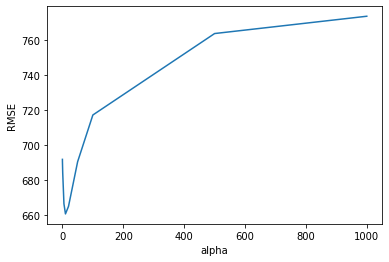

In [ ]:
alpha_set = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
plt.plot(alpha_set, RMSE_3a)
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.show()
plt.close()

**Q7 Case 3B: Method = Ridge, x_continue = std., x_binary = keep, y = de-mean**

Construct a prediction model using the setting of Case 3B. You should consider at least the following values for the regularization coefficient

( α
 ): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to  α.

 What is the best test RMSE? What are predictions and the true outcome values for the first 20 data points in the testing data using the best α
 ?

In [ ]:
y_pre_3b, RMSE_3b = predict(x_train, y_train, x_test, y_test,'Ridge',"std.","keep","de-mean")

Best alpha =  20
Best RMSE =  645.5168123938738


In [ ]:
print("The first 20 predictions and true outcome values in testing data using best alpha:")
result = pd.DataFrame(y_pre_3b[:20], columns = ['Predictions'])
result['True outcomes'] = y_test
print(result)

The first 20 predictions and true outcome values in testing data using best alpha:
    Predictions  True outcomes
0   1142.269542           1183
1    254.157015            189
2   1834.024889           2327
3     15.718169             76
4    599.763663            354
5    635.940390            713
6    427.856444            204
7    603.662060            288
8    514.523788            555
9    580.001060            586
10   544.341760            446
11   477.184421            884
12   801.545545            524
13   557.452872            672
14   396.278865             23
15   615.151524            570
16  1474.674174           1361
17  2504.864373           5934
18  3524.859645           2319
19  3438.403437           1633


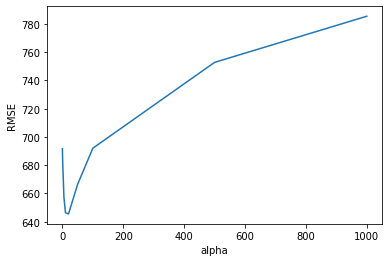

In [ ]:
alpha_set = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
plt.plot(alpha_set, RMSE_3b)
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.show()
plt.close()

**Q8 Case 3C: Method = Ridge, x_continue = keep, x_binary = keep, y = de-mean**

Construct a prediction model using the setting of Case 3C. You should consider at least the following values for the regularization coefficient   

( α
 ): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to  α.

 What is the best test RMSE? What are predictions and the true outcome values for the first 20 data points in the testing data using the best α
 ?

In [ ]:
y_pre_3c, RMSE_3c = predict(x_train, y_train, x_test, y_test,'Ridge',"keep","keep","de-mean")

Best alpha =  10
Best RMSE =  660.5612900111672


In [ ]:
print("The first 20 predictions and true outcome values in testing data using best alpha:")
result = pd.DataFrame(y_pre_3c[:20], columns = ['Predictions'])
result['True outcomes'] = y_test
print(result)

The first 20 predictions and true outcome values in testing data using best alpha:
    Predictions  True outcomes
0   1068.333624           1183
1    229.755319            189
2   2008.558892           2327
3   -102.874899             76
4    541.457699            354
5    606.459258            713
6    414.982798            204
7    602.810514            288
8    500.184385            555
9    492.306636            586
10   508.376500            446
11   409.130022            884
12   730.467680            524
13   561.060328            672
14   294.450897             23
15   602.482867            570
16  1632.182715           1361
17  2698.882818           5934
18  3841.631528           2319
19  3892.400909           1633


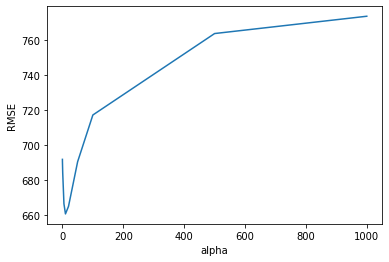

In [ ]:
alpha_set = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
plt.plot(alpha_set, RMSE_3c)
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.show()
plt.close()

**Q9 Case 3D: Method = Ridge, x_continue = std., x_binary = std., y = de-mean**

Construct a prediction model using the setting of Case 3D. You should consider at least the following values for the regularization coefficient

( α
 ): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to  α.

 What is the best test RMSE? What are predictions and the true outcome values for the first 20 data points in the testing data using the best α
 ?

In [ ]:
y_pre_3d, RMSE_3d = predict(x_train, y_train, x_test, y_test,'Ridge',"std.","std.","de-mean")

Best alpha =  100
Best RMSE =  588.793465752767


In [ ]:
print("The first 20 predictions and true outcome values in testing data using best alpha:")
result = pd.DataFrame(y_pre_3d[:20], columns = ['Predictions'])
result['True outcomes'] = y_test
print(result)

The first 20 predictions and true outcome values in testing data using best alpha:
    Predictions  True outcomes
0   1040.500123           1183
1    278.465050            189
2   1997.724464           2327
3    -21.140365             76
4    554.215257            354
5    602.840642            713
6    337.523470            204
7    599.435785            288
8    470.293704            555
9    500.724140            586
10   511.148619            446
11   387.743553            884
12   700.089577            524
13   532.222810            672
14   255.183118             23
15   653.356378            570
16  1728.169192           1361
17  2775.002711           5934
18  3174.792252           2319
19  3141.857976           1633


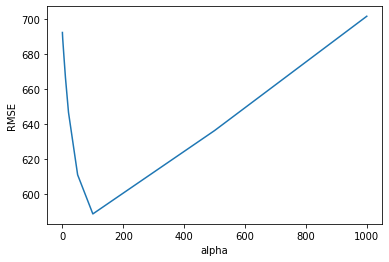

In [ ]:
alpha_set = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
plt.plot(alpha_set, RMSE_3d)
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.show()
plt.close()

**Q10 Case 4: Method = Lasso, x_continue = std., x_binary = keep, y = de-mean**

Construct a prediction model using the setting of Case 3D. You should consider at least the following values for the regularization coefficient

( α
 ): 0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000. Plot the test RMSE with respect to  α.

 What is the best test RMSE? What are predictions and the true outcome values for the first 20 data points in the testing data using the best α
 ?

In [ ]:
y_pre_4, RMSE_4 = predict(x_train, y_train, x_test, y_test,"Lasso","std.","keep","de-mean")

Best alpha =  500
Best RMSE =  928.809510933216


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47975917.14863924, tolerance: 32249.892376
  positive)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4456630.676012307, tolerance: 32249.892376
  positive)


In [ ]:
print("The first 20 predictions and true outcome values in testing data using best alpha:")
result = pd.DataFrame(y_pre_4[:20], columns = ['Predictions'])
result['True outcomes'] = y_test
print(result)

The first 20 predictions and true outcome values in testing data using best alpha:
    Predictions  True outcomes
0        810.34           1183
1        810.34            189
2        810.34           2327
3        810.34             76
4        810.34            354
5        810.34            713
6        810.34            204
7        810.34            288
8        810.34            555
9        810.34            586
10       810.34            446
11       810.34            884
12       810.34            524
13       810.34            672
14       810.34             23
15       810.34            570
16       810.34           1361
17       810.34           5934
18       810.34           2319
19       810.34           1633


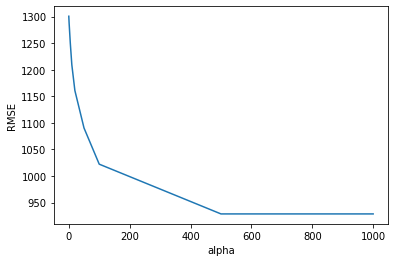

In [ ]:
alpha_set = [0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
plt.plot(alpha_set, RMSE_4)
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.show()
plt.close()

**Q11 Summarize the best RMSE of all cases and discuss your findings. How should we preprocess the features?**


Case | Method | x_continue | x_binary |   y    | RMSE
-----|--------|------------|----------|--------|-----
1    | ymean  |   not used | not used |  keep  |928.8095
2A   |   OLS  |    keep    |   keep   |  keep  |692.2891
2B   |   OLS  |    keep    |   keep   | de-mean|692.2891
2C   |   OLS  |     std.   |    std.  | de-mean|692.2891
3A   |  Ridge |    keep    |   keep   |  keep  |660.5613
3B   |  Ridge |     std.   |   keep   | de-mean|645.5168
3C   |  Ridge |    keep    |   keep   | de-mean|660.5613
3D   |  Ridge |     std.   |    std.  | de-mean|588.7935
4    |  Lasso |     std.   |   keep   | de-mean|928.8095

1. The lowest RMSE occurs in case 3D, while the highest occurs in case 1 and case 4. When observing the RMSE plots of Lasso models, it is noticeable that after alpha = 500, RMSE no longer decreases and remains equal to the RMSE of Case 1 without further reduction.
2. In case 2A, 2B, and 2C, all RMSEs are the same. After the first 20 records were examined, the predicted values for y are identical. I think this is because, in the case of 2A and 2B, demean essentially shifts the regression line and then shifts it back, resulting in identical predicted values. For 2A and 2C, standardization is a linear transformation that does not affect the results of OLS.
3. When using Ridge regression, there is a significant decrease in RMSE compared to simple OLS, with the best performance achieved when fully standardized and demeaned. The optimal performance obtained in this case should be due to mean standardization and a proper penalty term.
4. Surprisingly, when using Lasso models, the results are similar to using the simplest y-mean method. I speculate this may be because, although there are 43 features in the data, many are derived through one-hot encoding, leading to relatively low overall dimensions. Lasso is generally more suitable for high-dimensional sparse data, which could possibly explaine its suboptimal performance in this case.

In summary, during data preprocessing, de-meaning seems ineffective. It is possibly because these are all linear models, de-meaning does not significantly impact the results. Regardless of whether the variables are continuous or binary, standardization can reduce RMSE. Therefore, the overall better data preprocessing method should be standardizing all variables.